In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('engine.csv')
df.head()

setting1  setting2  setting3  temp_fan_inlet  temp_lpc_outlet  \
0   -0.0018    0.0006     100.0          518.67           641.89   
1    0.0043   -0.0003     100.0          518.67           641.82   
2    0.0018    0.0003     100.0          518.67           641.55   
3    0.0035   -0.0004     100.0          518.67           641.68   
4    0.0005    0.0004     100.0          518.67           641.73   

   temp_hpc_outlet  temp_lpt_outlet  pressure_fan_inlet  pressure_bypass_duct  \
0          1583.84          1391.28               14.62                 21.60   
1          1587.05          1393.13               14.62                 21.61   
2          1588.32          1398.96               14.62                 21.60   
3          1584.15          1396.08               14.62                 21.61   
4          1579.03          1402.52               14.62                 21.60   

   pressure_hpc_outlet  ...  corrected_fan_speed  corrected_core_speed  \
0               554.53  ...              2388.06               8137.72   
1               554.77  ...              2387.98               8131.09   
2               555.14  ...              2387.99               8140.58   
3               554.25  ...              2387.93               8140.44   
4               555.12  ...              2387.94               8136.67   

   bypass_ratio  burner_fuel_air_ratio  bleed_enthalpy  demanded_fan_speed  \
0        8.3905                   0.03             391                2388   
1        8.4167                   0.03             392                2388   
2        8.3802                   0.03             391                2388   
3        8.4018                   0.03             391                2388   
4        8.3867                   0.03             390                2388   

   demanded_corrected_fan_speed  hpt_collant_bleed  lpt_coolant_bleed  ttf  
0                         100.0              38.94            23.4585  286  
1                         100.0              39.06            23.4085  285  
2                         100.0              39.11            23.4250  284  
3                         100.0              39.13            23.5027  283  
4                         100.0              39.18            23.4234  282  

[5 rows x 25 columns]

In [4]:
df.isnull().sum()

setting1                        0
setting2                        0
setting3                        0
temp_fan_inlet                  0
temp_lpc_outlet                 0
temp_hpc_outlet                 0
temp_lpt_outlet                 0
pressure_fan_inlet              0
pressure_bypass_duct            0
pressure_hpc_outlet             0
physical_fan_speed              0
physical_core_speed             0
engine_pressure_ratio           0
static_pressure_hpc_outlet      0
fuel_flow_ration_ps30           0
corrected_fan_speed             0
corrected_core_speed            0
bypass_ratio                    0
burner_fuel_air_ratio           0
bleed_enthalpy                  0
demanded_fan_speed              0
demanded_corrected_fan_speed    0
hpt_collant_bleed               0
lpt_coolant_bleed               0
ttf                             0
dtype: int64

<AxesSubplot:>

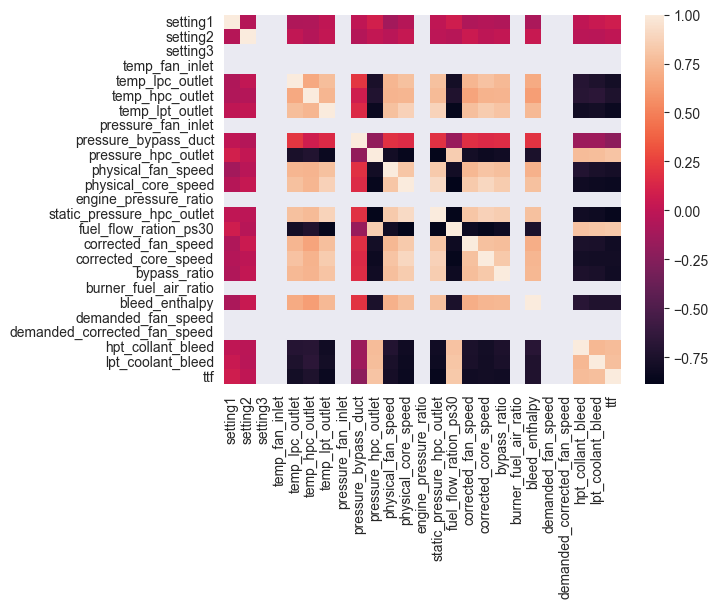

In [6]:
cor = df.corr()
sns.heatmap(data=cor)

In [9]:
l =['setting3','temp_fan_inlet','pressure_fan_inlet','engine_pressure_ratio','burner_fuel_air_ratio','demanded_fan_speed','demanded_corrected_fan_speed']

In [7]:
df.describe()

setting1    setting2  setting3  temp_fan_inlet  temp_lpc_outlet  \
count  287.000000  287.000000     287.0          287.00       287.000000   
mean     0.000051    0.000088     100.0          518.67       642.435226   
std      0.002320    0.000298       0.0            0.00         0.560214   
min     -0.006800   -0.000400     100.0          518.67       641.270000   
25%     -0.001400   -0.000200     100.0          518.67       642.025000   
50%      0.000000    0.000100     100.0          518.67       642.360000   
75%      0.001400    0.000400     100.0          518.67       642.800000   
max      0.007600    0.000600     100.0          518.67       643.940000   

       temp_hpc_outlet  temp_lpt_outlet  pressure_fan_inlet  \
count       287.000000       287.000000              287.00   
mean       1588.181986      1404.265854               14.62   
std           6.596730         9.737248                0.00   
min        1575.380000      1387.160000               14.62   
25%        1583.950000      1397.450000               14.62   
50%        1587.040000      1402.110000               14.62   
75%        1592.260000      1409.005000               14.62   
max        1610.100000      1431.170000               14.62   

       pressure_bypass_duct  pressure_hpc_outlet  ...  corrected_fan_speed  \
count            287.000000           287.000000  ...           287.000000   
mean              21.609338           553.853484  ...          2388.053554   
std                0.002491             0.940728  ...             0.063861   
min               21.600000           550.850000  ...          2387.920000   
25%               21.610000           553.335000  ...          2388.000000   
50%               21.610000           554.100000  ...          2388.050000   
75%               21.610000           554.525000  ...          2388.090000   
max               21.610000           555.450000  ...          2388.260000   

       corrected_core_speed  bypass_ratio  burner_fuel_air_ratio  \
count            287.000000    287.000000                 287.00   
mean            8143.246167      8.423983                   0.03   
std                8.683012      0.041128                   0.00   
min             8129.680000      8.342800                   0.03   
25%             8137.065000      8.395850                   0.03   
50%             8140.610000      8.413100                   0.03   
75%             8146.925000      8.444650                   0.03   
max             8175.570000      8.537700                   0.03   

       bleed_enthalpy  demanded_fan_speed  demanded_corrected_fan_speed  \
count       287.00000               287.0                         287.0   
mean        392.38676              2388.0                         100.0   
std           1.64728                 0.0                           0.0   
min         389.00000              2388.0                         100.0   
25%         391.00000              2388.0                         100.0   
50%         392.00000              2388.0                         100.0   
75%         393.00000              2388.0                         100.0   
max         398.00000              2388.0                         100.0   

       hpt_collant_bleed  lpt_coolant_bleed         ttf  
count         287.000000         287.000000  287.000000  
mean           38.901150          23.338997  143.000000  
std             0.199332           0.114796   82.993976  
min            38.230000          22.972100    0.000000  
25%            38.805000          23.274750   71.500000  
50%            38.930000          23.359200  143.000000  
75%            39.050000          23.420650  214.500000  
max            39.240000          23.600500  286.000000  

[8 rows x 25 columns]

Al de grijze data in de heatmap hebben allemaal dezelfde values

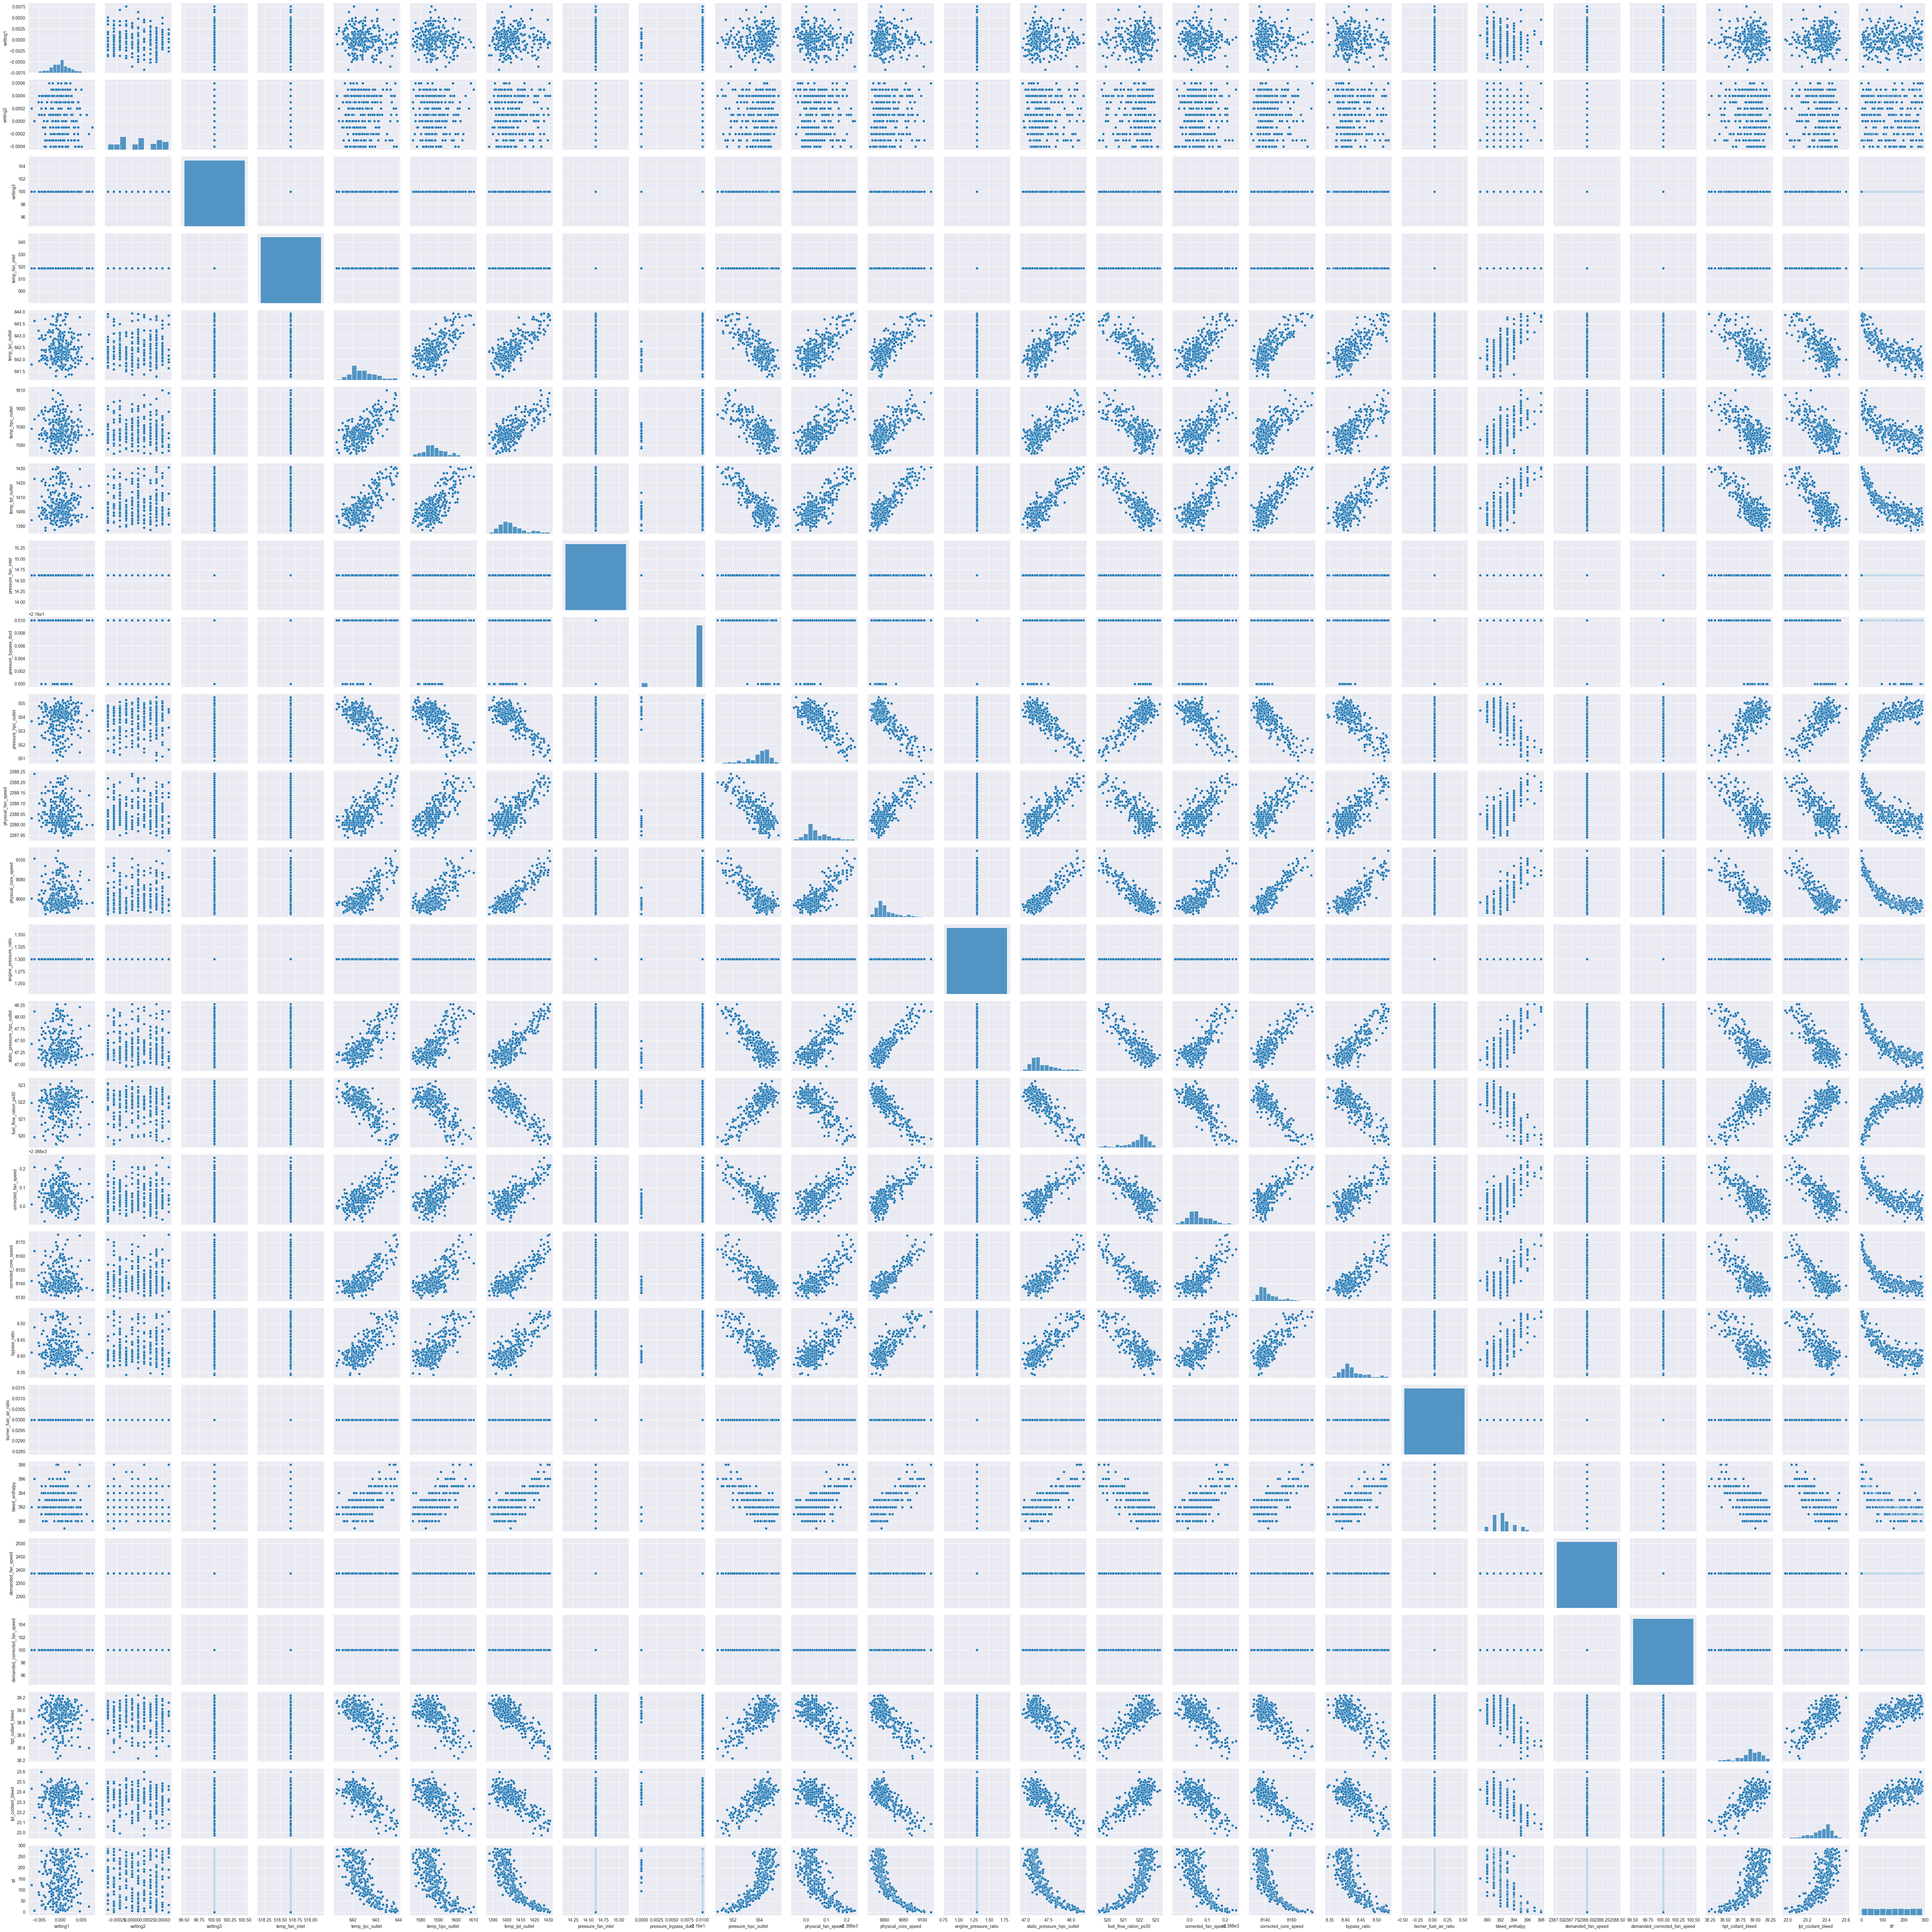

In [8]:
sns.pairplot(data=df)

In [14]:
df2=df
for i in l:
    df2.drop(i,axis=1,inplace=True)

<AxesSubplot:>

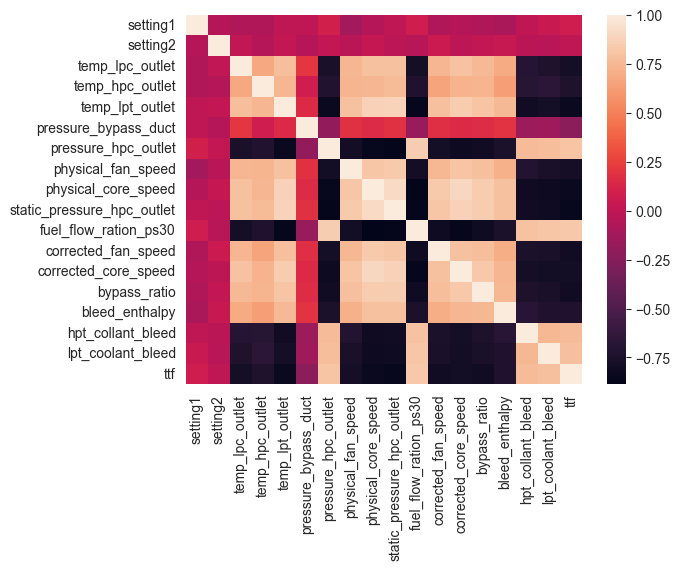

In [15]:
corr = df2.corr()
sns.heatmap(data=corr)

In [17]:
df2.describe()

setting1    setting2  temp_lpc_outlet  temp_hpc_outlet  \
count  287.000000  287.000000       287.000000       287.000000   
mean     0.000051    0.000088       642.435226      1588.181986   
std      0.002320    0.000298         0.560214         6.596730   
min     -0.006800   -0.000400       641.270000      1575.380000   
25%     -0.001400   -0.000200       642.025000      1583.950000   
50%      0.000000    0.000100       642.360000      1587.040000   
75%      0.001400    0.000400       642.800000      1592.260000   
max      0.007600    0.000600       643.940000      1610.100000   

       temp_lpt_outlet  pressure_bypass_duct  pressure_hpc_outlet  \
count       287.000000            287.000000           287.000000   
mean       1404.265854             21.609338           553.853484   
std           9.737248              0.002491             0.940728   
min        1387.160000             21.600000           550.850000   
25%        1397.450000             21.610000           553.335000   
50%        1402.110000             21.610000           554.100000   
75%        1409.005000             21.610000           554.525000   
max        1431.170000             21.610000           555.450000   

       physical_fan_speed  physical_core_speed  static_pressure_hpc_outlet  \
count          287.000000           287.000000                  287.000000   
mean          2388.057213          9062.652439                   47.389512   
std              0.063001            12.491827                    0.293672   
min           2387.940000          9044.620000                   46.930000   
25%           2388.010000          9054.220000                   47.190000   
50%           2388.040000          9058.300000                   47.300000   
75%           2388.090000          9068.925000                   47.520000   
max           2388.240000          9109.360000                   48.270000   

       fuel_flow_ration_ps30  corrected_fan_speed  corrected_core_speed  \
count             287.000000           287.000000            287.000000   
mean              521.811603          2388.053554           8143.246167   
std                 0.799368             0.063861              8.683012   
min               519.480000          2387.920000           8129.680000   
25%               521.460000          2388.000000           8137.065000   
50%               522.040000          2388.050000           8140.610000   
75%               522.340000          2388.090000           8146.925000   
max               523.260000          2388.260000           8175.570000   

       bypass_ratio  bleed_enthalpy  hpt_collant_bleed  lpt_coolant_bleed  \
count    287.000000       287.00000         287.000000         287.000000   
mean       8.423983       392.38676          38.901150          23.338997   
std        0.041128         1.64728           0.199332           0.114796   
min        8.342800       389.00000          38.230000          22.972100   
25%        8.395850       391.00000          38.805000          23.274750   
50%        8.413100       392.00000          38.930000          23.359200   
75%        8.444650       393.00000          39.050000          23.420650   
max        8.537700       398.00000          39.240000          23.600500   

              ttf  
count  287.000000  
mean   143.000000  
std     82.993976  
min      0.000000  
25%     71.500000  
50%    143.000000  
75%    214.500000  
max    286.000000

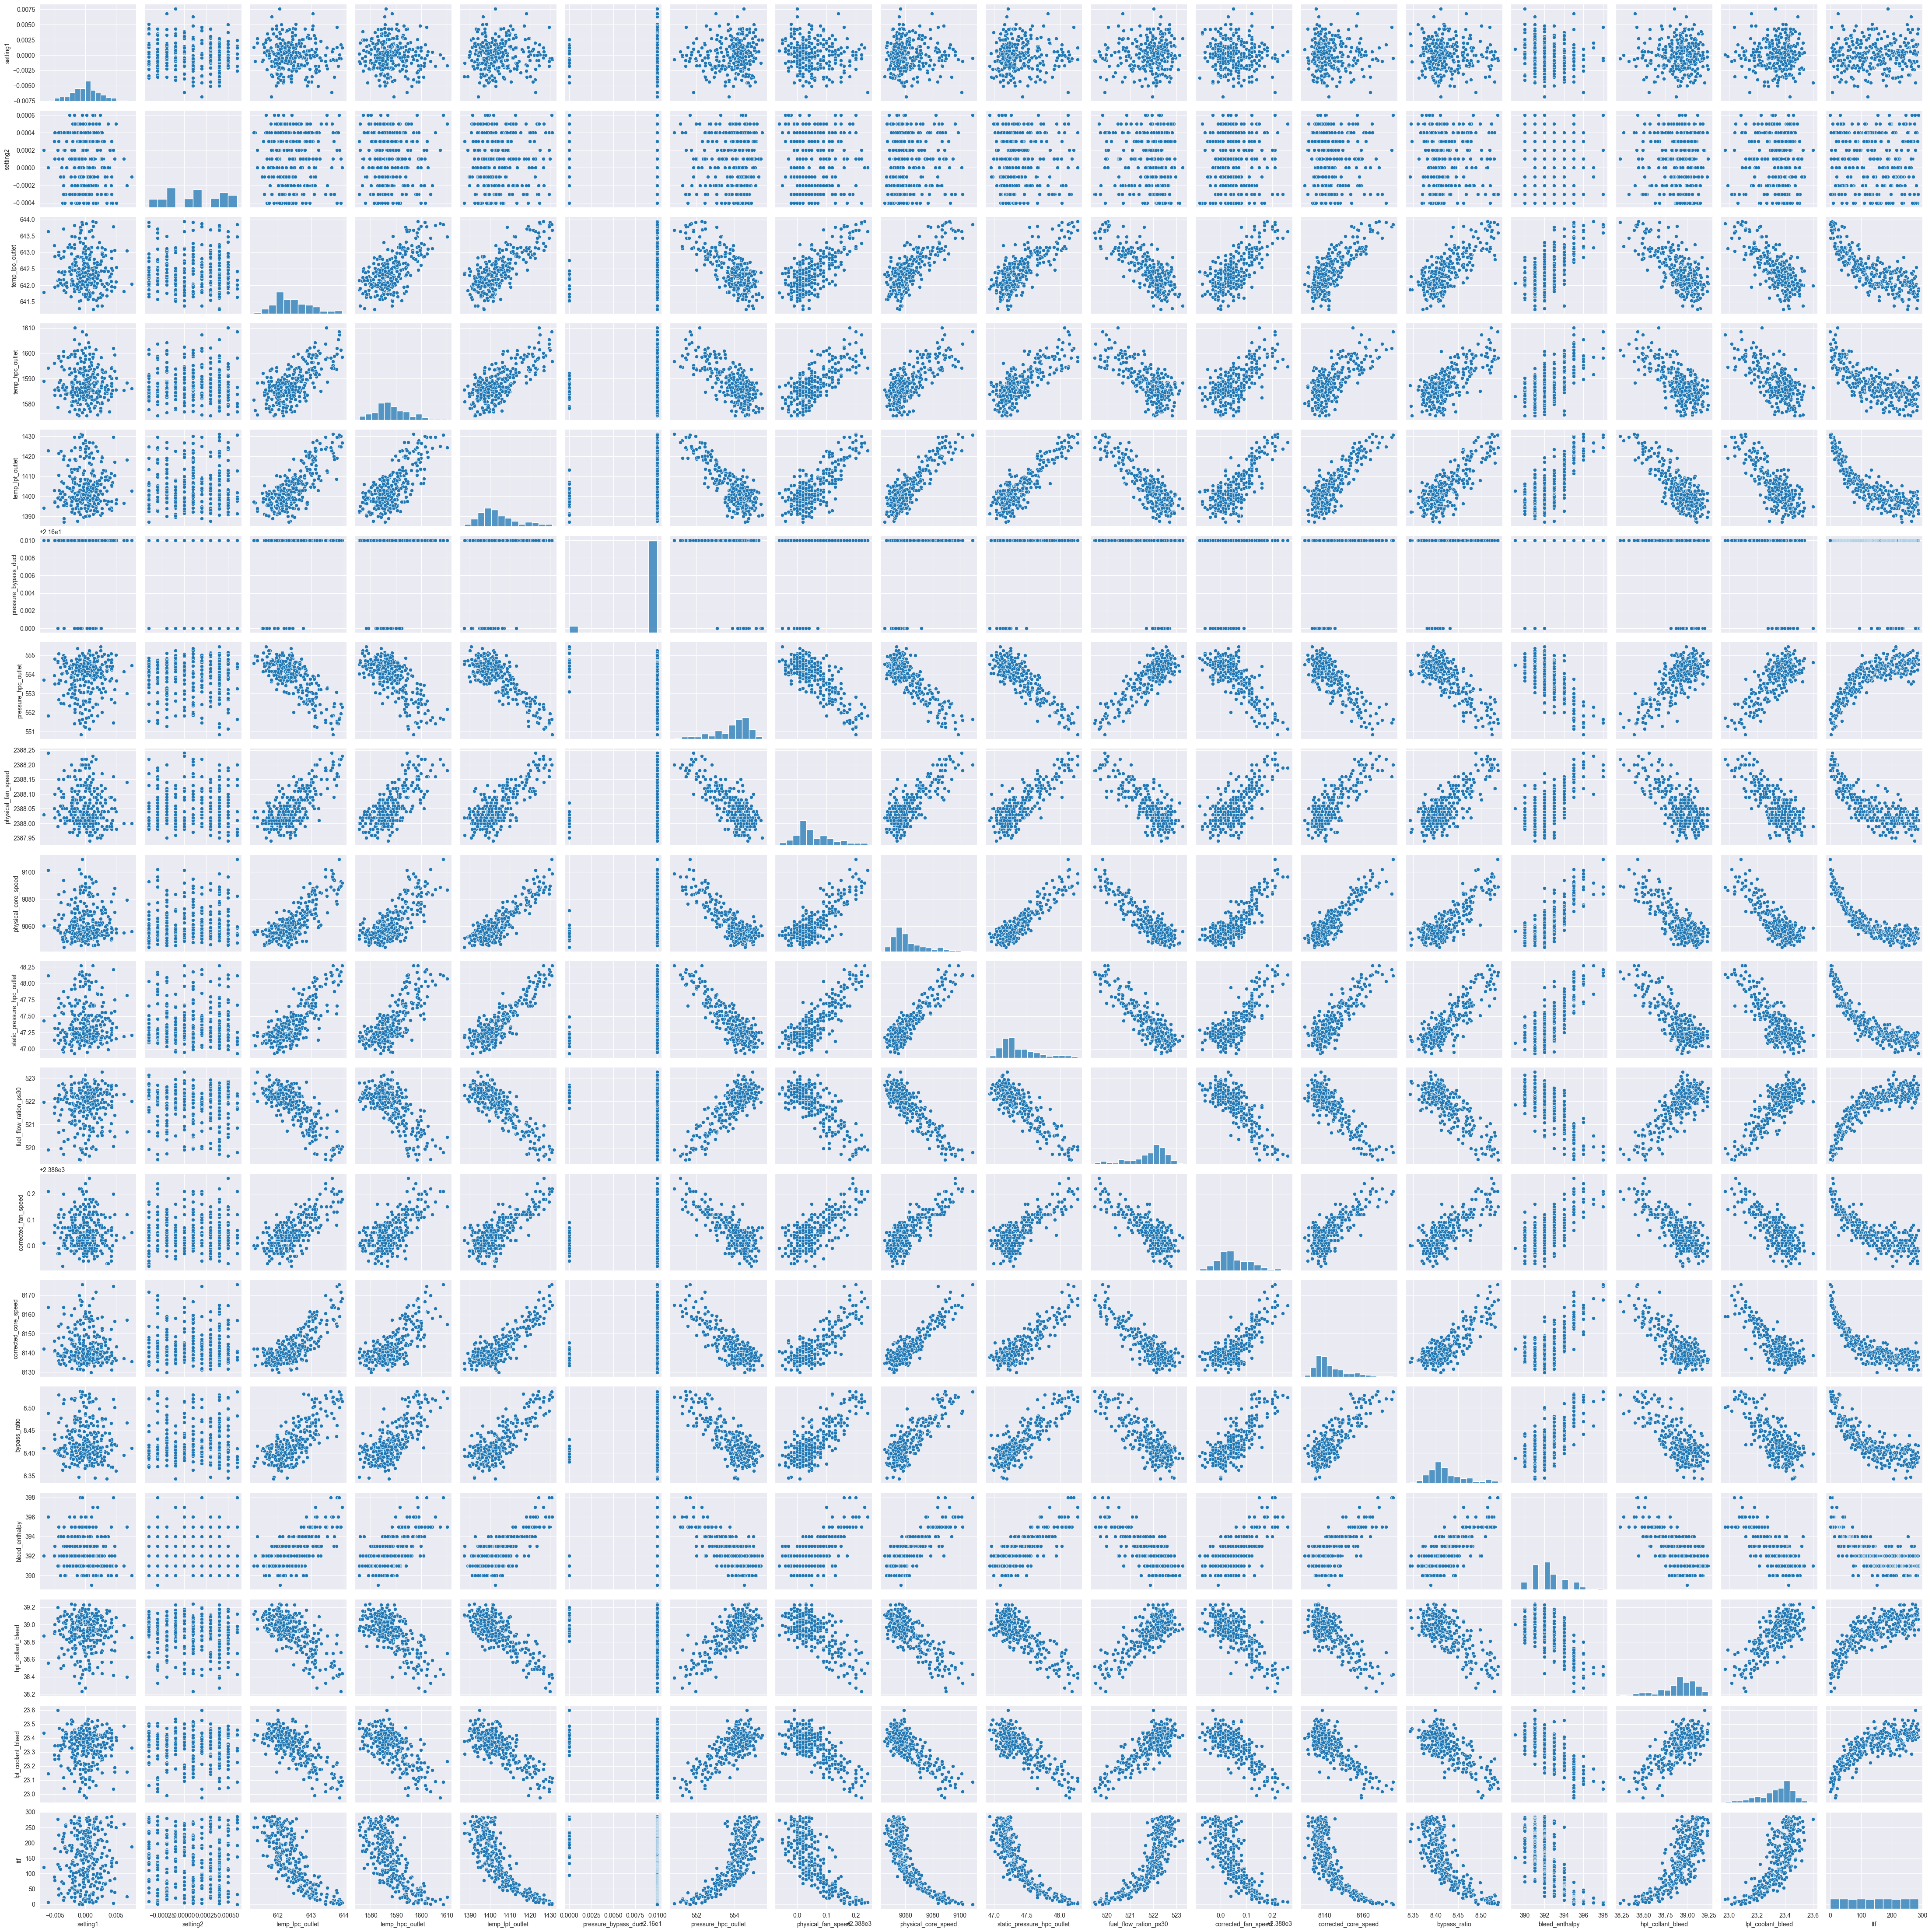

In [16]:
sns.pairplot(df2)